In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [2]:
data=pd.read_csv('./data/zhengqi.txt',sep='\s+')
data.shape

(2888, 39)

In [3]:
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.016,-0.143,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,...,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,NaN,NaN
1,1000.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### 空值检查

In [4]:
# data.info()

data.isnull().sum()

V0        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       1
target    1
dtype: int64

### 填充空值


In [5]:
# data['V37'].fillna(method='bfill')
# data['V37'].fillna(method='ffill')
# data['V37'].fillna(data['V37'].median())
data['V37'].fillna(data['V37'].mean().round(3),inplace=True) # 保留三位小数,inplace 表示修改原数据
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.016,-0.143,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,...,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,-0.129,NaN
1,1000.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### 删除空值

In [6]:
# data.dropna()

data.dropna(subset=['V0','target'],inplace=True)

### 异常值

In [7]:
data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,...,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000
mean,0.469275,0.056082,0.289870,-0.067954,0.012769,-0.558446,0.183583,0.117012,0.178069,-0.168779,...,0.097635,0.055458,0.128048,0.020700,0.009406,0.008376,0.199599,0.031572,-0.129160,0.126336
std,18.650133,0.941677,0.911358,0.970426,0.888493,0.518008,0.917461,0.954168,0.895526,0.953291,...,1.061384,0.902090,0.873070,0.902722,1.003467,0.999485,0.980897,0.969737,1.015427,0.984136
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226500,-0.313000,-0.652500,-0.385000,-0.852500,-0.310000,-0.295000,-0.158500,-0.390000,...,-0.664000,-0.283000,-0.170000,-0.407500,-0.499000,-0.290000,-0.199500,-0.412500,-0.797500,-0.350500
50%,0.359000,0.273000,0.386000,-0.045000,0.110000,-0.466000,0.388000,0.345000,0.362000,0.042000,...,-0.024000,0.053000,0.300000,0.039000,-0.040000,0.160000,0.364000,0.138000,-0.185000,0.313000
75%,0.726000,0.599000,0.918500,0.624000,0.550500,-0.154000,0.831500,0.782500,0.726000,0.042000,...,0.745500,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644500,0.495500,0.793500
max,1000.968000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


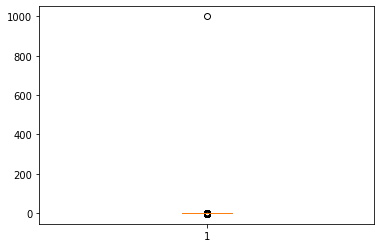

In [26]:
plt.boxplot(data['V0'])
plt.show()

In [9]:
data.shape

(2887, 39)

####  与 &  或  |   非 ~

In [10]:
data_normal=data[(data['V0']<10) & (data['V0']>-2)]

In [11]:
data_normal.shape

(2775, 39)

{'whiskers': [<matplotlib.lines.Line2D at 0x2888d1ae640>,
 'caps': [<matplotlib.lines.Line2D at 0x2888d1aec40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2888d1ae2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2888d1bd3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2888d1bd760>],
 'means': []}

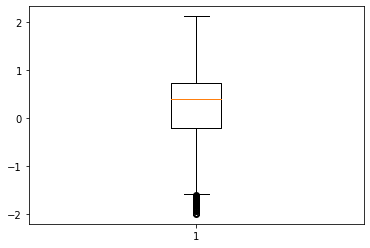

In [12]:
plt.boxplot(data_normal['V0'])
plt.show()

### pd.get_dummies(data,columns=['列名'])  用于不定序数据转化

### data[’列名‘].map({"优":0,"良":1....})
### data[’列名‘]=data[’列名‘].astype(np.float64)

In [13]:
x_test=np.array([['男','北京','已婚'],['女','北京','已婚'],['男','苏州','未婚'],['男','南京','未婚']])

print(x_test.shape)

def auto_order(X):
    for i in range(X.shape[1]):
        X[:,i]=LabelEncoder().fit_transform(X[:,i])
        
        print(X[:,i])
    return X

(4, 3)


In [14]:
r1=auto_order(x_test)
r1

['1' '0' '1' '1']
['0' '0' '2' '1']
['0' '0' '1' '1']


array([['1', '0', '0'],
       ['0', '0', '0'],
       ['1', '2', '1'],
       ['1', '1', '1']], dtype='<U2')

In [15]:
r=OneHotEncoder().fit_transform(r1).toarray()

print(r)

[[0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1.]]


### 相关性分析 删除相关性比较低的列



In [16]:
data_normal.corr()['target'].abs().sort_values()

V34       0.006042
V21       0.013278
V26       0.017522
V25       0.018232
V14       0.022027
V32       0.030421
V33       0.077241
V22       0.079099
V29       0.087866
V9        0.089715
V15       0.110810
V35       0.117448
V17       0.125077
V28       0.125239
V19       0.127023
V30       0.158923
V18       0.160681
V13       0.184265
V23       0.189190
V11       0.233735
V24       0.236017
V5        0.288379
V7        0.310271
V36       0.328915
V20       0.374488
V6        0.387608
V10       0.398353
V12       0.487755
V3        0.489373
V4        0.509948
V37       0.529786
V16       0.595271
V2        0.678213
V31       0.754041
V27       0.815469
V8        0.820991
V1        0.847180
V0        0.853419
target    1.000000
Name: target, dtype: float64

In [17]:
r3=data_normal.corr()['target'].abs().sort_values()
del_index=r3[r3<0.1].index

In [18]:
data_del=data_normal.drop(del_index,axis=1)

data_del.shape

(2775, 29)

### 3 KNN

In [19]:
y=data_del['target']
x=data_del.drop('target',axis=1)
x.shape
y.shape

(2775,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)

In [21]:
for i in range(2,20):
    knn_model=KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train_std,y_train)
    score=knn_model.score(X_test_std,y_test)
    print(score,i)

0.7164440931842948 2
0.754948548893688 3
0.7703394104376383 4
0.7780781016067279 5
0.7786237199148739 6
0.786946348797508 7
0.7893810162917627 8
0.7905606571413422 9
0.7932922771752342 10
0.7945947448662327 11
0.7988962263251635 12
0.797448613669741 13
0.7953052314229547 14
0.7925146807496901 15
0.7932088016561626 16
0.7924215130245088 17
0.7923326854102937 18
0.7937021462251993 19


### 随机深林

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)
for i in [1,10,100]:
    rgs_model = RandomForestRegressor(n_estimators=i)  ##随机森林模型
    rgs_model = rgs_model.fit(X_train, y_train)
    score=rgs_model.score(X_test,y_test)
    print(score,i)

0.6585440130537514 1
0.8283651975125158 10
0.8450271865600331 100


### PCA

In [23]:
data_normal.shape

(2775, 39)

In [24]:
y=data_normal['target']
x=data_normal.drop('target',axis=1)

# pca 为了减少训练的时间，但是准确率可能会有降低
# 如果时间充足，就不需要用PCA 直接用原数据去训练，删除下面的三行
pca = PCA(n_components=28)
pca.fit(x)
x=pca.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)
for i in [1,10,100]:
    rgs_model = RandomForestRegressor(n_estimators=i)  ##随机森林模型
    rgs_model = rgs_model.fit(X_train, y_train)
    score=rgs_model.score(X_test,y_test)
    print(score,i)

0.5247514233821688 1
0.7362942487524324 10
0.760597806632891 100


In [25]:
y=data_normal['target']
x=data_normal.drop('target',axis=1)

# pca 为了减少训练的时间，但是准确率可能会有降低
# 如果时间充足，就不需要用PCA 直接用原数据去训练，删除下面的三行
pca = PCA(n_components=28)
pca.fit(x)
x=pca.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape
std=StandardScaler()
std_tf=std.fit(X_train)
X_train_std=std_tf.transform(X_train)
X_test_std=std_tf.transform(X_test)

rgs_model = RandomForestRegressor(n_estimators=100)  ##随机森林模型
rgs_model = rgs_model.fit(X_train, y_train)
score=rgs_model.score(X_test,y_test)
print(score,i)

0.8006701156720113 100
